In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import sklearn as sk
data = pd.read_csv('/content/drive/MyDrive/Data/Adult_TrainDataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In the upper cell, the train data loaded and the pandas and sklearn libraries imported.

In [ ]:
for column in data.columns:
    mode = data[column].mode()[0]
    data[column] = data[column].replace("?", mode)

replacing missing data ('?') with mode of each column

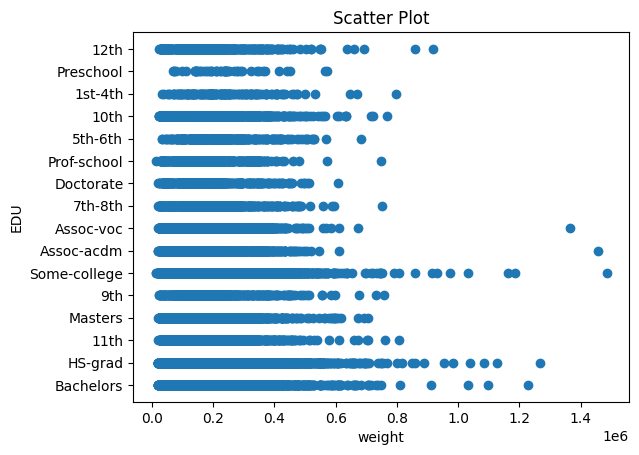

In [ ]:
import matplotlib.pyplot as plt

y = data['Education']
x = data['Final_Weight']
plt.scatter(x, y)
plt.ylabel('EDU')
plt.xlabel('weight')
plt.title('Scatter Plot')
plt.show()

In the upper part, the scatter plot related to final weight and education is drawn.
looks likes they're non Related to each other a lot
  This is done using of Matplotlib library

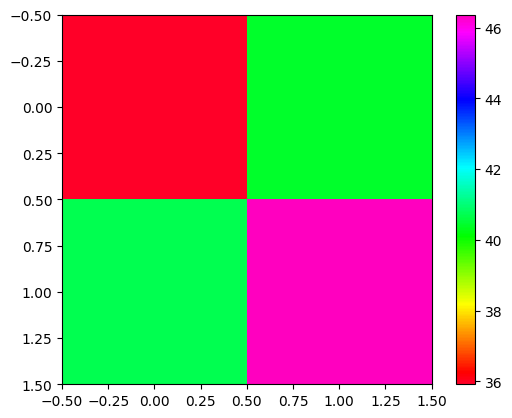

In [ ]:
pivot_table = data.pivot_table(index='Sex', columns='Income', values='Hours-Per-Week')
plt.imshow(pivot_table, cmap='gist_rainbow', interpolation='nearest')
plt.colorbar()
plt.show()

This chart is also a heatmap that shows the relationship between education and income according to the number of hours they work in a week.

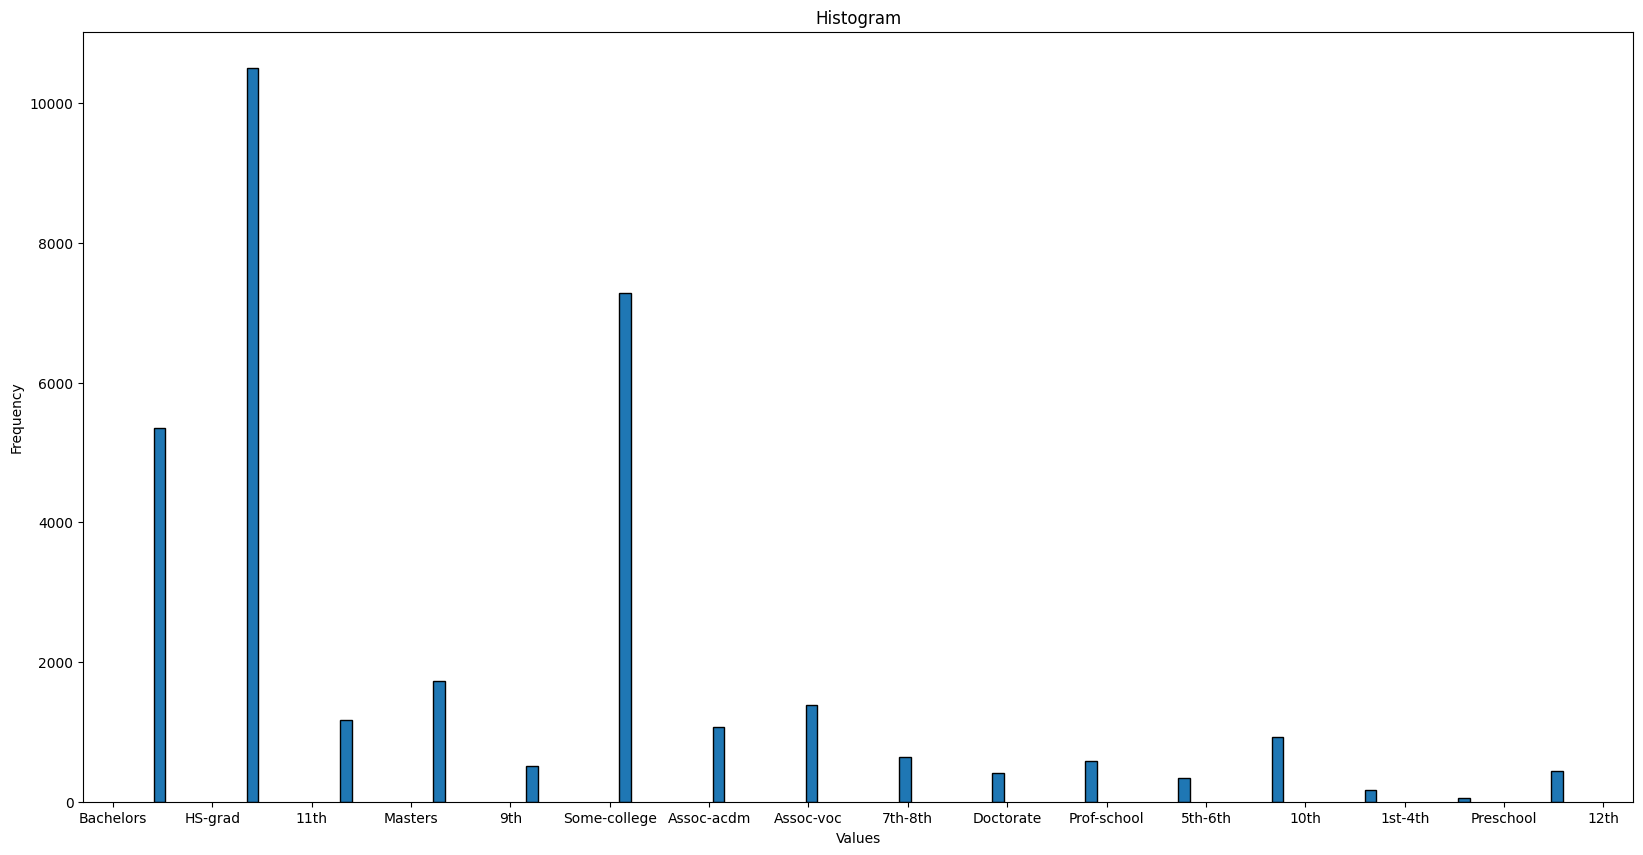

In [ ]:
column = data['Education']
total_width = 2
num_bins = 16
bar_width = total_width / num_bins
plt.figure(figsize=(20, 10))
plt.hist(column, bins=num_bins, edgecolor='black', rwidth=bar_width)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

histogram chart related to education

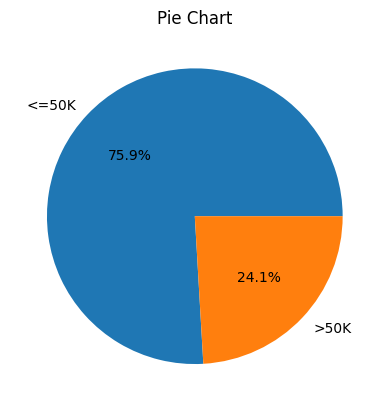

In [ ]:

column = data['Income']
value_counts = column.value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart')
plt.show()

piechart of income

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

print(data.head())

   Age  Work_Class  Final_Weight  Education  Education-Number  Marital_Status  \
0   39           6         77516          9                13               4   
1   50           5         83311          9                13               2   
2   38           3        215646         11                 9               0   
3   53           3        234721          1                 7               2   
4   28           3        338409          9                13               2   

   Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   Hours-Per-Week  Native_Country  Income  
0              40              38       0  
1   

In a comparison for the two methods of one-hot encoding and label encoding, because some of the features had sequential data, it was better to use label encoding, as a result, it is more suitable than one-hot coding, and all the categorical data were encoded with this method.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
print(normalized_data.head())

        Age  Work_Class  Final_Weight  Education  Education-Number  \
0  0.301370    0.857143      0.044302   0.600000          0.800000   
1  0.452055    0.714286      0.048238   0.600000          0.800000   
2  0.287671    0.428571      0.138113   0.733333          0.533333   
3  0.493151    0.428571      0.151068   0.066667          0.400000   
4  0.150685    0.428571      0.221488   0.600000          0.800000   

   Marital_Status  Occupation  Relationship  Race  Sex  Capital_Gain  \
0        0.666667    0.000000           0.2   1.0  1.0       0.02174   
1        0.333333    0.230769           0.0   1.0  1.0       0.00000   
2        0.000000    0.384615           0.2   1.0  1.0       0.00000   
3        0.333333    0.384615           0.0   0.5  1.0       0.00000   
4        0.333333    0.692308           1.0   0.5  0.0       0.00000   

   Capital_Loss  Hours-Per-Week  Native_Country  Income  
0           0.0        0.397959            0.95     0.0  
1           0.0        0.12244

Normalizing all features on a scale of 0-1 to make our models work better.

In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/Data/Adult_TestDataset.csv')

for column in test_data.columns:
    mode = test_data[column].mode()[0]
    test_data[column] = test_data[column].replace("?", mode)

for column in test_data.columns:
    if test_data[column].dtype == 'object':
        test_data[column] = label_encoder.fit_transform(test_data[column])

print(test_data.head())

scaler = MinMaxScaler()

normalized_test_data = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)

print(normalized_test_data.head())



   Age  Work_Class  Final_Weight  Education  Education-Number  Marital_Status  \
0   25           3        226802          1                 7               4   
1   38           3         89814         11                 9               2   
2   28           1        336951          7                12               2   
3   44           3        160323         15                10               2   
4   18           3        103497         15                10               4   

   Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0           6             3     2    1             0             0   
1           4             0     4    1             0             0   
2          10             0     4    1             0             0   
3           6             0     2    1          7688             0   
4           9             3     4    0             0             0   

   Hours-Per-Week  Native_Country  Income  
0              40              37       0  
1   

 Repeating encodeing and normalizing for test data frame

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

X_train = data.drop(columns=['Income'])
y_train = data['Income']

X_test = test_data.drop(columns=['Income'])
y_test = test_data['Income']

knn_model = KNeighborsClassifier()
svm_model = SVC()
dt_model = DecisionTreeClassifier()

knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

print("KNN Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("SVM Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Decision Tree Model:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

KNN Model:
Confusion Matrix:
[[11400  1035]
 [ 2614  1232]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86     12435
           1       0.54      0.32      0.40      3846

    accuracy                           0.78     16281
   macro avg       0.68      0.62      0.63     16281
weighted avg       0.75      0.78      0.75     16281

SVM Model:
Confusion Matrix:
[[12413    22]
 [ 3250   596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12435
           1       0.96      0.15      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.88      0.58      0.58     16281
weighted avg       0.83      0.80      0.74     16281

Decision Tree Model:
Confusion Matrix:
[[10816  1619]
 [ 1476  2370]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.8

1. Loading SVM & KNN & DT model
2. Train prediction model
3. Test and measure accuracy

Analysis of results
1. KNN:
    - Precision: it is about 81% for class 0 and about 54% for class 1. This shows that the model has the ability to correctly recognize class 0 samples, but it performs poorly for class 1.
    - Recall: for class 0 it is about 92% and for class 1 it is about 32%. This shows that the model has the ability to find most instances of class 0, but detects few instances of class 1.
    - F1-Score: it is about 86% for class 0 and about 40% for class 1. This measure is the harmonic mean of Precision and Recall. For class 0, it performs well, but for class 1, it performs poorly.
    - Accuracy: about 78%. This measure is the ratio of the number of correct predictions to the total number of samples. Here, the model has generally been reasonably successful in distinguishing classes.

2. SVM:
    - Precision: it is about 79% for class 0 and about 96% for class 1. The model has the ability to correctly recognize class 0 samples and has a very good performance for class 1.
    - Recall: for class 0 it is about 100% and for class 1 it is about 15%. The model is able to find most instances of class 0, but detects few instances of class 1.
    -F1-Score: it is about 88% for class 0 and about 27% for class 1. For class 0, it works well, but not so well for class 1.
    - Accuracy: about 80%. The model is successful in distinguishing classes, but there is a poor performance for class 1.

3. Decision Tree:
    - Precision: it is about 88% for class 0 and about 59% for class 1. The model has the ability to correctly recognize samples of class 0 and has an average performance for class 1.
    - Recall: for class 0 it is about 87% and for class 1 it is about 61%. The model has the ability to find most class 0 samples and recognize an acceptable number of class 1 samples.
    - F1-Score: it is about 87% for class 0 and about 60% for class 1. It has an acceptable result for both classes.
    - Accuracy: about 81%. The model has been successful in recognizing the classes in general.

Based on these results, it seems that using the decision tree has better accuracy in forecasting and the other two models have good accuracy only for one class, and overall their accuracy is not the same as the decision tree.